In [1]:
#!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,make_scorer,make_scorer, f1_score, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
tweets_df =  pd.read_csv("tweets_preproc.csv")
tweets_df = tweets_df.drop('Unnamed: 0', axis=1)
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
0,estrenos mensuales en netflix disney y prime ...,159917675,Twitter for iPhone,2022-01-01 01:22:09,1477087717167087621,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,estrenos mensuales netflix disney prime video ...,estren mensual netflix disney prim vide blog
1,albert alfred y la magia echa serie music...,385918940,Twitter for Android,2022-01-01 02:27:16,1477104103926996994,"{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...",0.421,Positivo,albert alfredo magia echa serie musica literat...,albert alfred magi echa seri music literatur n...
2,tratar a todos los equipos de futbol en las r...,238286158,Talon Android,2022-01-01 08:20:30,1477192997016113153,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.402,Positivo,tratar equipos futbol retransmisiones igual,trat equip futbol retransmision igual
3,bajada de precio de la fibra mejorar la calid...,82388144,Twitter for Android,2022-01-01 08:51:51,1477200887663804421,"{'neg': 0.081, 'neu': 0.704, 'pos': 0.215, 'co...",0.557,Positivo,bajada precio fibra mejorar calidad sonido ima...,baj preci fibr mejor calid son imag canal mejo...
4,postes de cortando la dp a la altura del km e...,196401713,Twitter for iPhone,2022-01-01 09:22:55,1477208706182000640,"{'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'comp...",-0.128,Negativo,postes cortando altura km ares corona,post cort altur km ares coron
...,...,...,...,...,...,...,...,...,...,...
159851,los clientes ya sabemos eso los que no se sab...,1227852829257326592,Twitter Web App,2022-06-30 20:26:43,1542605573895725056,"{'neg': 0.056, 'neu': 0.792, 'pos': 0.151, 'co...",0.476,Positivo,clientes sabemos saben cumplen contrato deberi...,client sab sab cumpl contrat deberi leer contr...
159852,lo que me gustaria saber es por que llevo una...,1168354052,Twitter for Android,2022-06-30 21:07:14,1542615768289902592,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.827,Positivo,gustaria saber llevo semana contratando servic...,gustari sab llev seman contrat servici ofert g...
159853,deberias cambiar esa bandera absurda o ahora ...,1397178749985202176,Twitter for Android,2022-06-30 21:55:32,1542627925358481409,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,Neutral,deberias cambiar bandera absurda ahora lobo,deberi cambi bander absurd ahor lob
159854,ya me falta poco y cambio de empresa suerte,452596569,Twitter for Android,2022-06-30 22:17:56,1542633561169305602,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.509,Positivo,falta cambio empresa suerte,falt cambi empres suert


In [4]:
tweets_positivo_df = tweets_df[tweets_df['Polaridad'] == "Positivo"]
tweets_positivo_df = tweets_positivo_df.dropna()
tweets_positivo_df = tweets_positivo_df.sample(n = 20000)

tweets_negativo_df = tweets_df[tweets_df['Polaridad'] == "Negativo"]
tweets_negativo_df = tweets_negativo_df.dropna()
tweets_negativo_df = tweets_negativo_df.sample(n = 20000)

tweets_df = pd.concat([tweets_positivo_df,tweets_negativo_df])
tweets_df

,text,author,source,timestamp,id,Puntuaciones,Puntuacion,Polaridad,Texto Preprocesado,Raiz Palabras
64953,no es una consulta es una reclamacion llame v...,136675430,Twitter for Android,2022-02-16 16:00:23,1493978574486917124,"{'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'comp...",0.077,Positivo,consulta reclamacion llame veces septiembre in...,consult reclamacion llam vec septiembr intent ...
73268,realmente una marca excelente,382241892,Twitter for Android,2022-03-22 10:02:24,1506209671371239426,"{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'comp...",0.705,Positivo,realmente marca excelente,realment marc excelent
110706,uuuuhhhhhh que emocion la uropali nada menos,2512836810,Twitter for iPhone,2022-04-08 20:12:16,1512523743238791180,"{'neg': 0.151, 'neu': 0.617, 'pos': 0.232, 'co...",0.290,Positivo,uuuuhhhhhh emocion propalo menos,uuuuhhhhhh emocion propal men
85259,hoy gracias a de participo en el sorteo de un...,1095134276,Twitter for Android,2022-05-11 10:21:43,1524333926419996676,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",0.493,Positivo,hoy gracias participo sorteo viajes personas s...,hoy graci particip sorte viaj person san sebas...
119257,impulsara el desplegando su red en todo el r...,87917306,Social Media Corresponsables,2022-06-15 09:30:08,1537004519938220038,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",0.382,Positivo,impulsara desplegando red recinto,impuls despleg red recint
...,...,...,...,...,...,...,...,...,...,...
94041,estoy recopilando todos los documentos los ...,1095433498813493251,Twitter for Android,2022-06-15 06:54:23,1536965325794705410,"{'neg': 0.056, 'neu': 0.889, 'pos': 0.054, 'co...",-0.026,Negativo,recopilando documentos pantallas test velocida...,recopil document pantall test veloc vist oper ...
146464,ni de cona me a costado horrores desvincularm...,1449971658375237635,Twitter for Android,2022-01-15 08:39:49,1482271290115379200,"{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'comp...",-0.710,Negativo,costado horrores desvincularse intentos coacci...,cost horror desvincul intent coaccion emple da...
9978,yo flipo debe ser algun favor de algun famil...,1901383232,Twitter Web App,2022-02-18 20:43:47,1494774667982299138,"{'neg': 0.148, 'neu': 0.714, 'pos': 0.138, 'co...",-0.052,Negativo,tipo debe ser alguna favor alguna familiar dir...,tip deb ser algun favor algun famili direct
90926,no es posible porque llevo meses sin cobertur...,1458834049225707520,Twitter for Android,2022-05-28 15:58:06,1530579173454057474,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",-0.552,Negativo,posible llevo meses cobertura suficiente incap...,posibl llev mes cobertur suficient incapac esp...


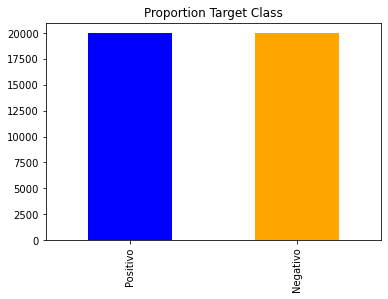

In [5]:
count_class=pd.value_counts(tweets_df["Polaridad"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [6]:
tweets_df['Texto Preprocesado'] = tweets_df['Texto Preprocesado'].astype(str)

In [7]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

print(len(main_text))
print(len(target))

40000
40000


In [8]:
main_text = tweets_df['Texto Preprocesado']
target = tweets_df['Polaridad']

In [9]:
n_classes = np.unique(target)
n_classes

array(['Negativo', 'Positivo'], dtype=object)

In [10]:
def add_label(tweet):
    output = []
    for i, s in zip(tweet.index, tweet):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [11]:
labeled_tweets = add_label(main_text)

In [12]:
#Necesitamos vectorizar el conjunto de tweets utilizando Doc2Vec
from gensim.models import Doc2Vec

d2v_model = Doc2Vec(vector_size=100, min_count=5, epochs=10)
d2v_model.build_vocab([i for i in tqdm(labeled_tweets)])
d2v_model.train(labeled_tweets, total_examples=len(tweets_df['Texto Preprocesado']),epochs=10)
# Crea los vectores de tweets
docvec_arrays = np.zeros((len(tweets_df['Texto Preprocesado']), 100))
for i in range(len(tweets_df)):
    docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape
# Etiqueta todos los tweets
labeled_reviews = add_label(tweets_df['Texto Preprocesado'])

100%|██████████| 40000/40000 [00:00<00:00, 2223296.27it/s]
C:\Users\curri\AppData\Local\Temp/ipykernel_8916/3853302831.py:10: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec_arrays[i,:] = d2v_model.docvecs[i].reshape((1,100))


In [13]:
#Definimos conjunto de entrenamiento y test
X = docvec_df #Tweet
y = target #Positivo o Negativo

X_train, X_test, y_train, y_test  = train_test_split(X,y,train_size=0.9,random_state=0)

In [14]:
# Definir el clasificador
sgd = SGDClassifier()

# Definir los parámetros a explorar en GridSearch
parameters = {
    'loss': ['hinge','squared_hinge'],
    'penalty': ['l1','l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000],
}

# Definir las métricas a utilizar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score,needs_threshold=True)
}

# Realizar GridSearch
sgd_cv = GridSearchCV(sgd, parameters, scoring=scoring, refit='accuracy', n_jobs=-1, cv=5, verbose=10)
sgd_cv.fit(X_train, y_train)

# Predice los datos de test
y_pred = sgd_cv.predict(X_test)

print('Best Accuracy Through Grid Search: {:.3f}'.format(sgd_cv.best_score_))
print('Best Parameters: {}\n'.format(sgd_cv.best_params_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Accuracy Through Grid Search: 0.796
Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l1'}



In [15]:
for accuracy, f1, roc_auc, params in zip(sgd_cv.cv_results_['mean_test_accuracy'], 
                             sgd_cv.cv_results_['mean_test_f1'], sgd_cv.cv_results_['mean_test_roc_auc'], 
                             sgd_cv.cv_results_['params']):
       print("%0.5f %0.5f %0.5f for %r" % (accuracy,f1,roc_auc, params))

0.79636 0.79624 0.88328 for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.79422 0.79405 0.88131 for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.79644 0.79627 0.88320 for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l1'}
0.79289 0.79217 0.88131 for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2'}
0.71256 0.71255 0.79187 for {'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.71758 0.71757 0.79489 for {'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.71089 0.71087 0.78865 for {'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 2000, 'penalty': 'l1'}
0.71539 0.71538 0.79290 for {'alpha': 0.0001, 'loss': 'squared_hinge', 'max_iter': 2000, 'penalty': 'l2'}
0.78664 0.78654 0.87377 for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.78242 0.78235 0.86979 for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalt

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def ConfusionMatrix(y_pred, y_test):
     # Compute and plot the Confusion matrix
     cf_matrix = confusion_matrix(y_test, y_pred)
     categories = ['Negativo','Positivo']
     group_names = ['True Neg','False Pos', 'False Neg','True Pos']
     group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / 
    np.sum(cf_matrix)]
     labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
     labels = np.asarray(labels).reshape(2,2)
     sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
     xticklabels = categories, yticklabels = categories)
     plt.xlabel("Predicted label", fontdict = {'size':14}, labelpad = 10)
     plt.ylabel("True label" , fontdict = {'size':14}, labelpad = 10)
     plt.title ("Matriz de confusion", fontdict = {'size':18}, pad = 20)

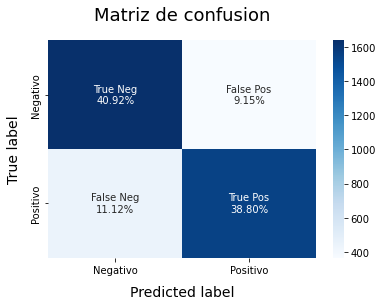

In [17]:
ConfusionMatrix(y_pred, y_test)

In [ ]:
clf = sgd_cv.best_estimator_
print('Test Accuracy (SGD): %.3f' % clf.score(X_test,y_test))

Test Accuracy (SGD): 0.797
